## An√°lisis - Premier League temporada 2015/2016 (masculina)

Vamos a hacer un an√°lisis de las distintas competiciones (las cinco grandes ligas durante la temporada 2015-2016 y de todos los partidos en general) para poder entender que caracter√≠sticas son m√°s importantes a la hora de tomar la decisi√≥n por parte del modelo de ML para decidir si el equipo va a ganar, perder o empatar el partido.

En este notebook en cuesti√≥n, vamos a analizar la Premier League en la temporada 2015/2016 (masculina).

Cargamos los datos de los partidos sobre la competici√≥n para entrenar el modelo y poder hacer el estudio de explicabilidad.

In [1]:
import os
import pandas as pd


competition_name = "Premier League"
competition_gender = "male"
season_name = "2015/2016"
season_name_for_filename = "2015_2016"

output_dir = "data/reduced/"
filename = f"{competition_name}({season_name_for_filename}_{competition_gender})_reduced.csv"
output_path = os.path.join(output_dir, filename)

if os.path.exists(output_path):
    print(f"Matches from the competition loaded from {output_path}")
    matches_in_PL = pd.read_csv(output_path)
else:
    print("You don't have data from the competition yet. Please run the notebook '0_datasets_building.ipynb' first.")

Matches from the competition loaded from data/reduced/Premier League(2015_2016_male)_reduced.csv


In [2]:
matches_in_PL.head(5)

match_id  shots_on_target_ratio_home  shots_on_target_ratio_away  \
0   3754097                    0.111111                    0.555556   
1   3754112                    0.300000                    0.285714   
2   3754141                    0.260870                    0.500000   
3   3754237                    0.421053                    0.555556   
4   3754300                    0.454545                    0.454545   

   average_shots_on_target_distance_home  \
0                              15.620819   
1                              10.397006   
2                              15.724369   
3                              16.690552   
4                              18.363562   

   average_shots_on_target_distance_away  shots_inside_area_ratio_home  \
0                              17.725682                      0.555556   
1                              13.959668                      0.700000   
2                              21.563397                      0.695652   
3                              10.904830                      0.789474   
4                              21.955396                      0.636364   

   shots_inside_area_ratio_away  pass_success_ratio_home  \
0                      0.777778                 0.808824   
1                      0.714286                 0.773852   
2                      0.500000                 0.834983   
3                      0.666667                 0.711392   
4                      0.363636                 0.785714   

   pass_success_ratio_away  cross_success_ratio_home  ...  \
0                 0.777778                  0.200000  ...   
1                 0.772834                  0.250000  ...   
2                 0.713158                  0.320000  ...   
3                 0.753012                  0.357143  ...   
4                 0.680912                  0.260870  ...   

   percentage_shots_under_pressure_home  \
0                              0.200000   
1                              0.250000   
2                              0.875000   
3                              0.625000   
4                              0.714286   

   percentage_shots_inside_area_under_pressure_home  \
0                                          0.000000   
1                                          0.333333   
2                                          0.875000   
3                                          0.625000   
4                                          0.800000   

   percentage_passes_under_pressure_home  \
0                               0.403846   
1                               0.569620   
2                               0.567797   
3                               0.365672   
4                               0.645833   

   percentage_passes_inside_area_under_pressure_home  \
0                                           0.285714   
1                                           0.666667   
2                                           0.750000   
3                                           0.428571   
4                                           0.600000   

   percentage_set_piece_shots_home  \
0                         0.400000   
1                         0.533333   
2                         0.642857   
3                         0.647059   
4                         0.615385   

   percentage_set_piece_shots_inside_area_home  percentage_substitutions_home  \
0                                     0.200000                            0.5   
1                                     0.500000                            0.6   
2                                     0.666667                            0.4   
3                                     0.666667                            0.6   
4                                     0.666667                            0.5   

   percentage_tactical_substitutions_home  percentage_tactical_changes_home  \
0                                     0.5                               0.5   
1                                     0.5                               

Una vez ya tenemos los datos cargados, entrenamos el mejor modelo (seleccionado tras la experimentaci√≥n) y mostramos sus resultados.

In [3]:
from src.analysis import premierleague_best_model


best_model_PL, evaluation_metrics, X_train_reduced_PL, X_test_reduced_PL, X_test_reduced_orig_PL, feature_names_reduced_PL, encoder_PL, match_ids_test = premierleague_best_model(matches_in_PL)
print(f"The best model for La Liga is {best_model_PL}")
print(f"The evaluation metrics for the best model are:")
evaluation_metrics.head()

The best model for La Liga is LogisticRegression(C=0.6261372210153997, l1_ratio=0.5193180715867101,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')
The evaluation metrics for the best model are:


Train Accuracy  Test Accuracy  Precision Macro  \
Logistic Regression MI        0.753289       0.697368         0.689362   

                        Precision Weighted  Recall Macro  Recall Weighted  \
Logistic Regression MI            0.693582      0.678779         0.697368   

                        F1 Macro  F1 Weighted  
Logistic Regression MI  0.681101     0.692363

Una vez ya tenemos el mejor modelo entrenado comenzamos el an√°lisis de explicabilidad.

### Estudio global

Vamos a comenzar por un estudio global. 

En este caso, al ser el mejor modelo Logistic Regression, vamos a fijarnos en el coeficiente (m√©todo coef_) que nos aporta el modelo para cada caracter√≠stica en cada clase. 
- Con esto, estamos observando la importancia global de cada caracter√≠stica para cada clase en t√©rminos de una relaci√≥n lineal. Es decir, estamos observando relaciones exclusivamente lineales entre las caracter√≠sticas y la predicci√≥n.
- Con esto, no se tiene en cuenta las interacciones entre caracter√≠sticas ni tampoco explica predicciones individuales.

Los gr√°ficos que se aparecen a continuaci√≥n muestran la importancia de cada caracter√≠stica para predecir una determinada clase de resultado en los partidos de LaLiga. Las clases son:
- Clase "away_team": Indica qu√© caracter√≠sticas influyen en que el equipo visitante gane el partido.
- Clase "draw": Indica qu√© caracter√≠sticas influyen en que el partido termine en empate.
- Clase "home_team": Indica qu√© caracter√≠sticas influyen en que el equipo local gane el partido.

Los valores representados en el eje X son los coeficientes de la regresi√≥n log√≠stica, que indican la magnitud e impacto de cada variable en la probabilidad de un resultado espec√≠fico. Valores positivos aumentan la probabilidad de que ocurra esa clase, mientras que valores negativos disminuyen dicha probabilidad.

Class 0: ['away_team']
Features with zero importance for class away_team:
['average_shots_on_target_distance_home', 'shots_inside_area_ratio_home', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'cross_success_ratio_home', 'dribbles_success_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'is_valid_win_last_home_match_home_team', 'is_valid_win_last_away_match_away_team', 'difference_passes_needed_to_make_a_shot_home', 'percentage_blocks_home', 'percentage_tackles_home', 'percentage_yellow_cards_home', 'percentage_dribbles_home', 'percentage_players_off_home', 'percentage_recoveries_attacking_third_home', 'percentage_set_piece_shots_home', 'percentage_tactical_substitutions_home']


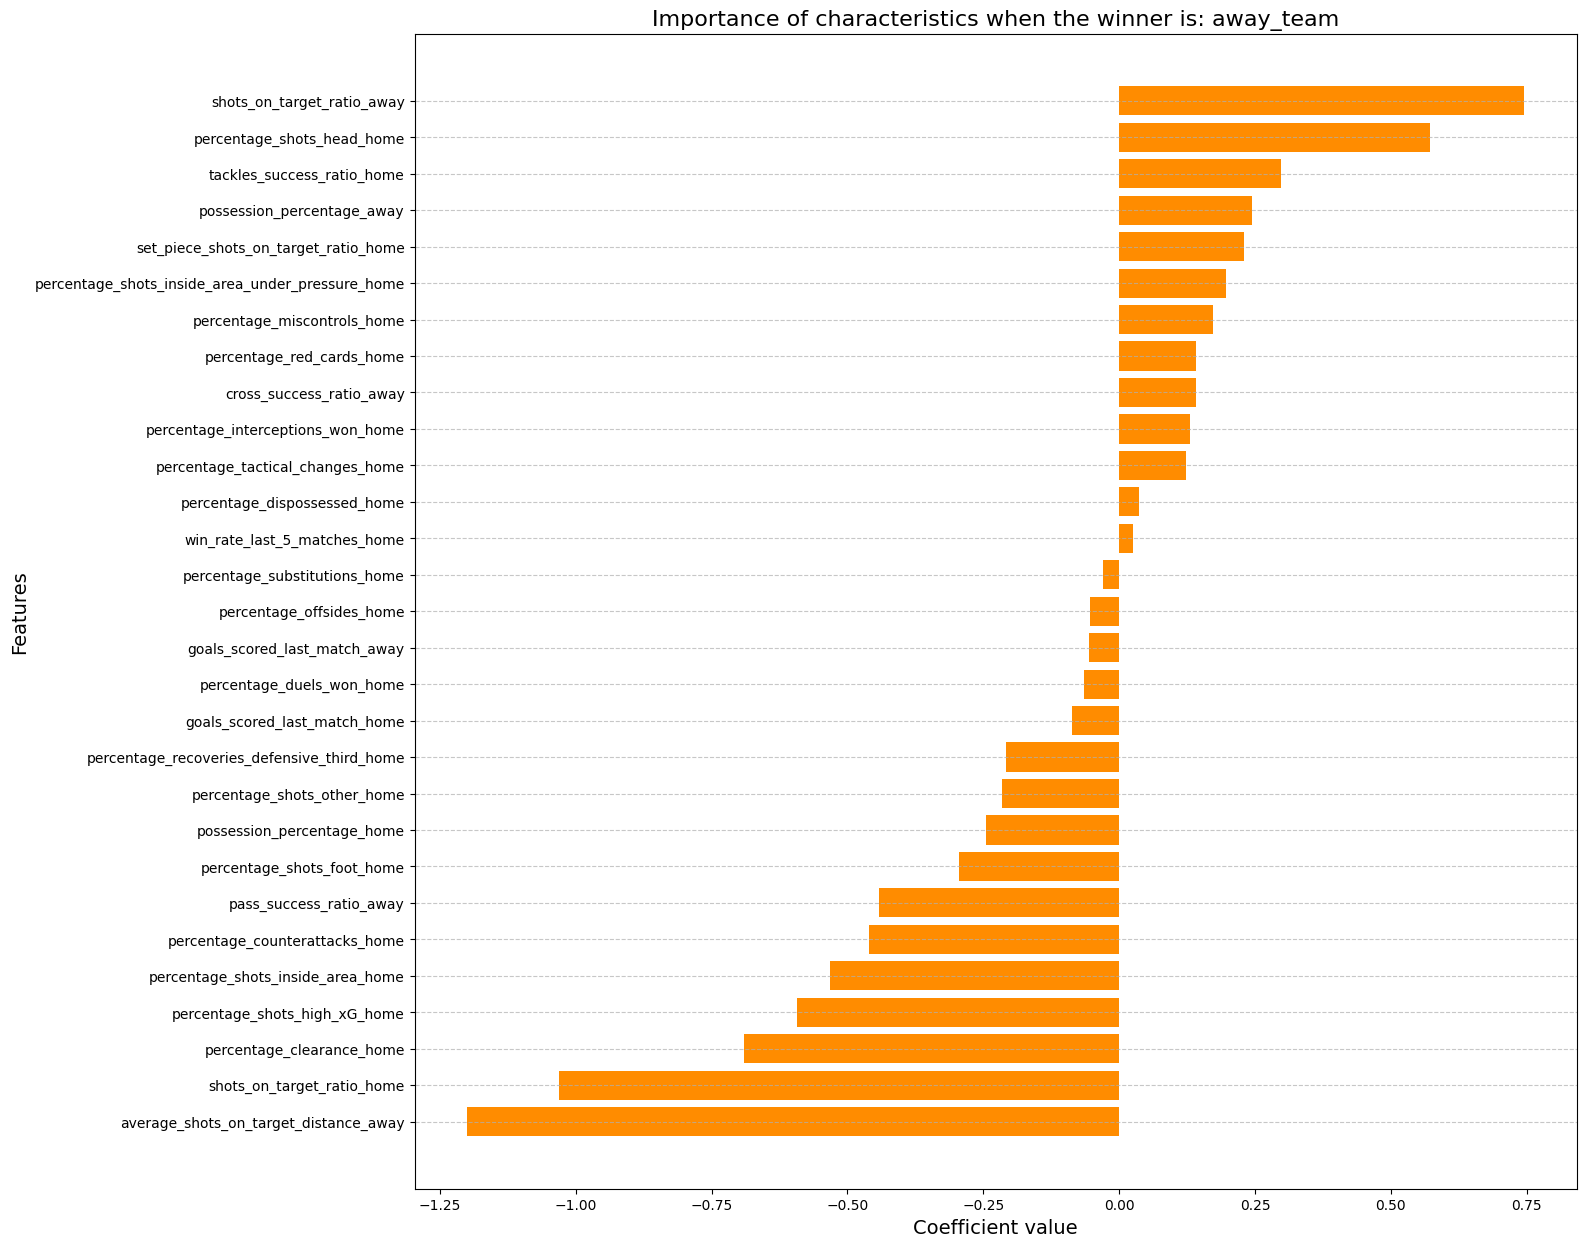

Class 1: ['draw']
Features with zero importance for class draw:
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'win_rate_last_5_matches_home', 'goals_scored_last_match_home', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'percentage_shots_other_home', 'percentage_clearance_home', 'percentage_miscontrols_home', 'percentage_red_cards_home', 'percentage_dribbles_home', 'percentage_players_off_home', 'percentage_dispossessed_home', 'percentage_counterattacks_home', 'percentage_recoveries_defensive_third_home', 'percentage_shots_inside_area_under_pressure_home', 'percentage_substitutions_home', 'percentage_tactical_changes_home']


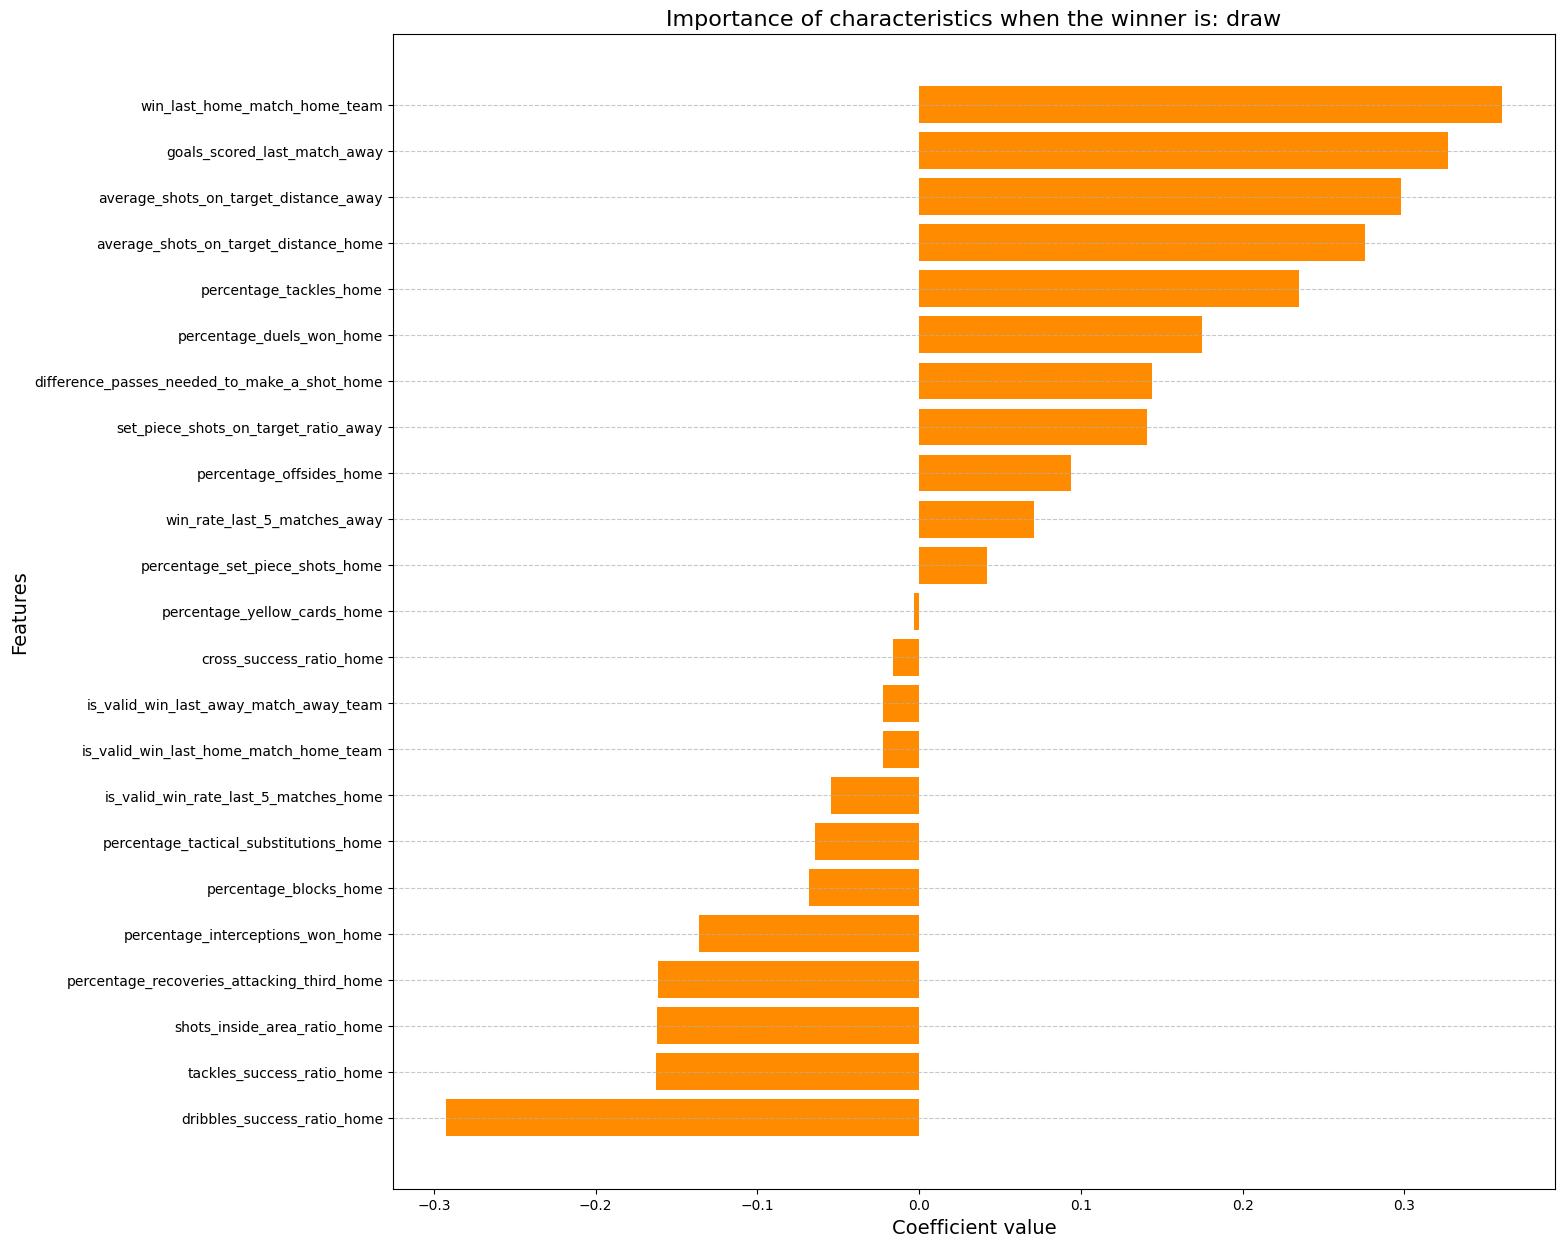

Class 2: ['home_team']
Features with zero importance for class home_team:
['average_shots_on_target_distance_away', 'shots_inside_area_ratio_away', 'pass_success_ratio_home', 'cross_success_ratio_home', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'win_rate_last_5_matches_home', 'is_valid_win_last_home_match_home_team', 'is_valid_win_last_away_match_away_team', 'goals_scored_last_match_away', 'percentage_interceptions_won_home', 'percentage_duels_won_home', 'percentage_offsides_home', 'percentage_players_off_home', 'percentage_recoveries_defensive_third_home']


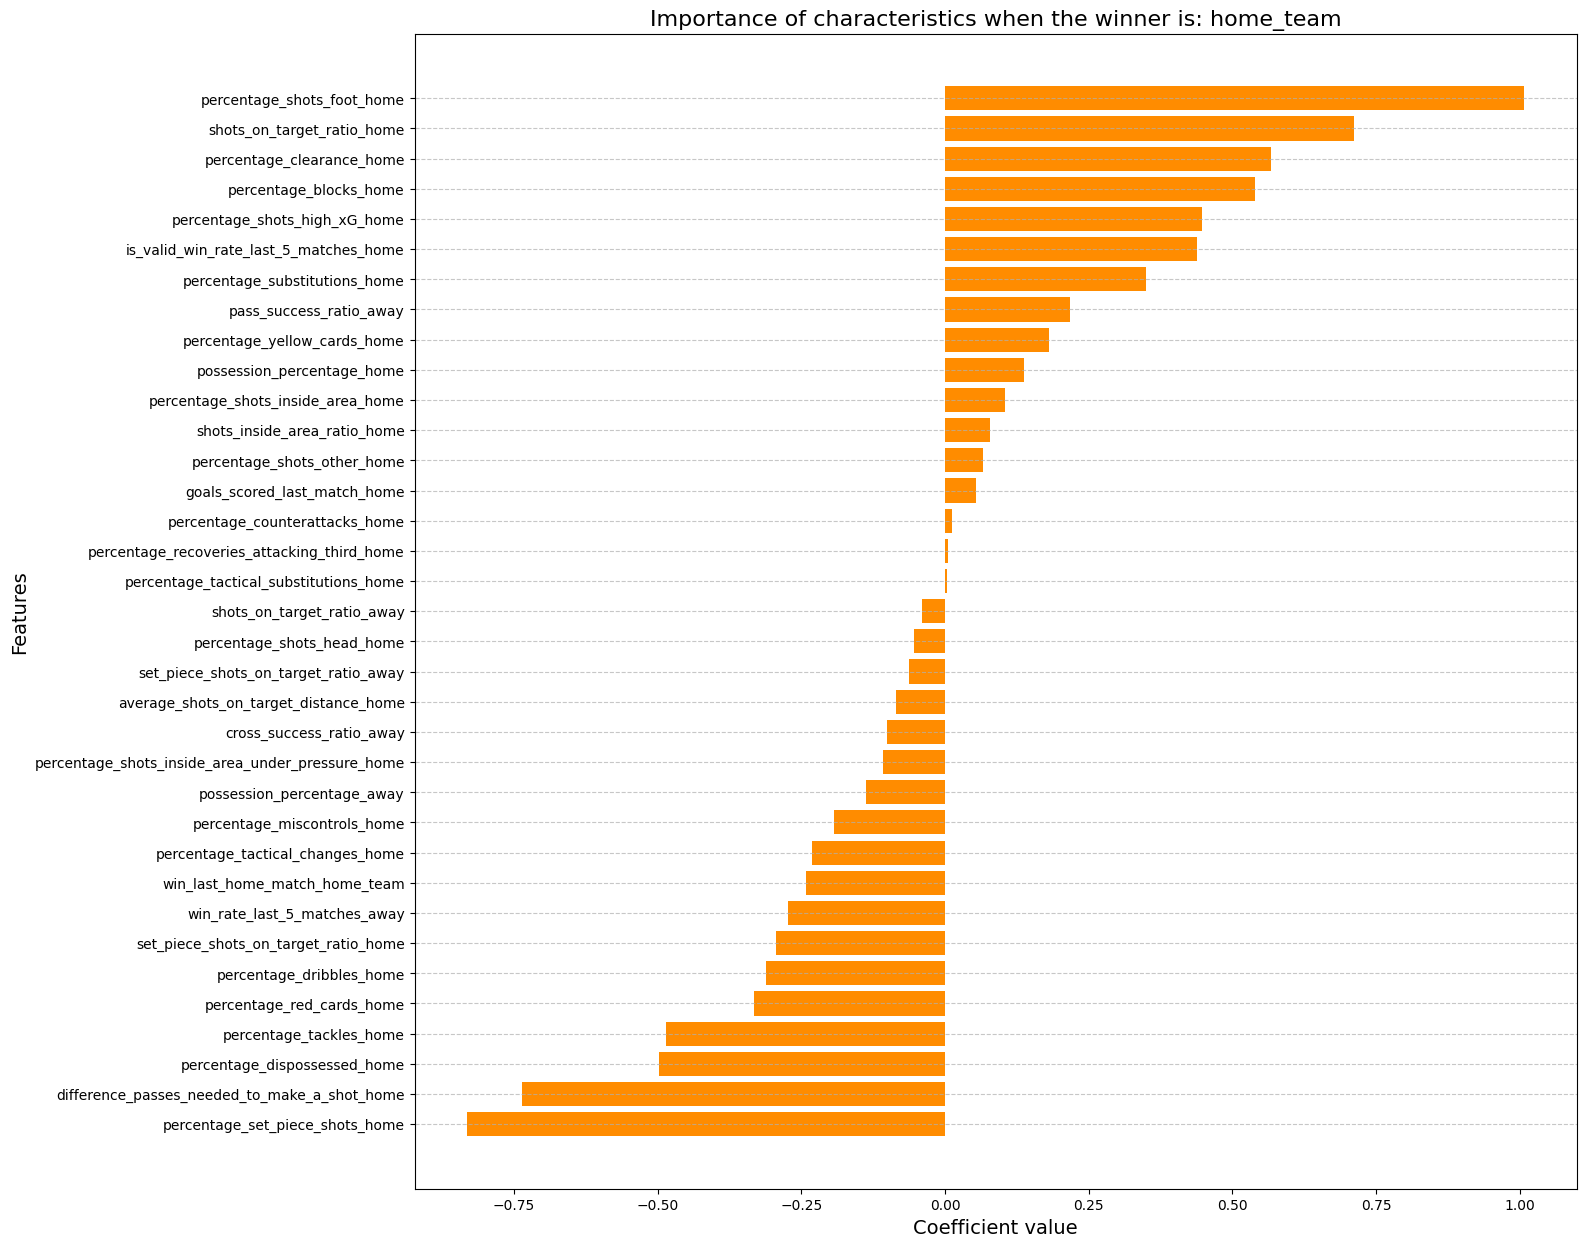

In [4]:
from src.analysis import logistic_regression_global_analysis

logistic_regression_global_analysis(best_model_PL, feature_names_reduced_PL, encoder_PL)

Vamos a analizar estos gr√°ficos:

- **Importancia de caracter√≠sticas para la victoria del equipo visitante (*away_team*)**: Las caracter√≠sticas en este gr√°fico aumentan la probabilidad de que el equipo visitante gane el partido.
    - **Caracter√≠sticas que favorecen la victoria del equipo visitante**: üìà
        - `shots_on_target_ratio_away`: Un mayor porcentaje de tiros a puerta del equipo visitante incrementa su probabilidad de marcar y ganar el partido.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a√©reo, lo que puede ser m√°s predecible y menos efectivo.
        - `possession_percentage_away`: Un mayor porcentaje de posesi√≥n del equipo visitante le permite controlar el ritmo del partido y reducir las oportunidades del equipo local.
        - `percentage_shots_inside_area_under_pressure_home`: Un alto porcentaje de tiros dentro del √°rea bajo presi√≥n por parte del equipo local puede significar que sus oportunidades de gol son menos efectivas.
        - `percentage_miscontrols_home`: Un mayor n√∫mero de errores en el control del bal√≥n por parte del equipo local puede derivar en p√©rdidas que beneficien al visitante.
        - `percentage_red_cards_home`: Si el equipo local recibe m√°s tarjetas rojas que el equipo visitante, juega en inferioridad num√©rica, lo que favorece al visitante.
        - `cross_success_ratio_away`: Un alto √©xito en los centros del equipo visitante puede aumentar su capacidad para generar ocasiones de gol.
        - `percentage_tactical_changes_home`: Un mayor n√∫mero de cambios t√°cticos del equipo local puede sugerir problemas en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_dispossessed_home`: Un mayor porcentaje de veces que el equipo local pierde el bal√≥n no parece favorecer la victoria visitante.
    - **Caracter√≠sticas que no favorecen la victoria del equipo visitante**: üìâ
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde largas distancias, sus oportunidades de marcar disminuyen.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera m√°s peligro y dificulta la victoria del visitante.
        - `percentage_clearance_home`: Si el equipo local realiza muchas despejes efectivos, su defensa puede estar resolviendo bien las amenazas del visitante.
        - `percentage_shots_high_xG_home`: Si el equipo local genera muchos tiros con alto xG (expectativa de gol), es m√°s probable que convierta sus oportunidades.
        - `percentage_shots_inside_area_home`: Si el equipo local consigue realizar m√°s tiros dentro del √°rea, sus oportunidades de marcar aumentan.
        - `percentage_counterattacks_home`: Si el equipo local genera m√°s contraataques, puede aprovechar los espacios dejados por el visitante y hacerle da√±o.
        - `possession_percentage_home`: Un alto porcentaje de posesi√≥n del equipo local puede permitirle controlar el juego y reducir las oportunidades del visitante.
        - `percentage_shots_foot_home`, `percentage_shots_other_home`: Un mayor n√∫mero de tiros con los pies o con partes del cuerpo poco habituales (diferentes a la cabeza o los pies) del equipo local puede indicar que han probado m√°s veces a tirar en el partido que el equipo visitante.
        - `percentage_recoveries_defensive_third_home`: Un alto n√∫mero de recuperaciones en la zona defensiva del equipo local puede significar que se defiende bien y concede pocas oportunidades al visitante.
        - `goals_scored_last_match_home`: Si el equipo local anot√≥ varios goles en su √∫ltimo partido, es probable que llegue con confianza y en un buen estado de forma.
        - `percentage_duels_won_home`: Un mayor porcentaje de duelos ganados por el equipo local indica que impone su f√≠sico en el partido, dificultando el juego del visitante.
        - `goals_scored_last_match_away`: La cantidad de goles anotados por el equipo visitante en su √∫ltimo partido no favorece directamente su victoria en el presente encuentro.
        - `percentage_offsides_home`: Si el equipo local cae en fuera de juego con frecuencia, puede estar atacando m√°s y buscando constantemente superar la defensa del visitante.
        - `percentage_substitutions_home`: Un mayor n√∫mero de sustituciones del equipo local puede indicar ajustes t√°cticos que le permitan mejorar su desempe√±o durante el partido.              
    - **Caracter√≠sticas que no tienen importancia en la victoria del equipo visitante**:
        - `last_3_matches_form_home`, `last_3_matches_form_away`: La din√°mica de los √∫ltimos tres partidos de ambos equipos no tiene un impacto claro en la victoria del visitante.
        - `percentage_yellow_cards_home`: La cantidad de tarjetas amarillas recibidas por el equipo local no afecta significativamente la probabilidad de victoria del visitante.
        - `percentage_recoveries_middle_third_home`, `percentage_recoveries_offensive_third_home`: Las recuperaciones del equipo local en distintas zonas a la zona defensiva del campo no parecen influir en la victoria del visitante.
        - `percentage_set_piece_shots_on_target_ratio_away`, `percentage_dribbles_home`: Estas m√©tricas no muestran una correlaci√≥n clara con la victoria del equipo visitante.
    - **Conclusi√≥n**: Para que un equipo visitante tenga una mayor probabilidad de ganar en la Premier League, necesita tener un alto porcentaje de tiros a puerta y aprovechar las oportunidades dentro del √°rea; presionar y dificultar el juego del equipo local, forz√°ndolo a cometer errores en el control y en la circulaci√≥n del bal√≥n; sacar ventaja de la inferioridad num√©rica del equipo local en caso de expulsiones; mantener una posesi√≥n alta y precisi√≥n en los pases para controlar el ritmo del partido; y ser efectivo en jugadas a bal√≥n parado y en centros. Por otro lado, si el equipo local consigue generar peligro con tiros de alta calidad, mantiene la posesi√≥n y logra ser efectivo en la defensa y la recuperaci√≥n del bal√≥n, la victoria del equipo visitante se vuelve menos probable. Finalmente, algunas m√©tricas como la cantidad de tarjetas amarillas o las recuperaciones en el tercio medio y ofensivo no parecen ser determinantes en la probabilidad de victoria del equipo visitante en la Premier League.

- **Importancia de caracter√≠sticas para el empate (*draw*)**: El empate en un partido suele estar influenciado por un equilibrio en las m√©tricas de ataque y defensa de ambos equipos. Algunas observaciones clave:
    - **Caracter√≠sticas que favorecen el empate**: üìà
        - `win_last_home_match_home_team`: Si el equipo local gan√≥ su √∫ltimo partido en casa, esto podr√≠a indicar estabilidad en su rendimiento y mayor posibilidad de mantener el equilibrio en el marcador.
        - `goals_scored_last_match_away`: Si el equipo visitante viene de anotar goles en su √∫ltimo partido, podr√≠a demostrar una capacidad ofensiva suficiente para igualar el marcador en caso de recibir un gol.
        - `average_shots_on_target_distance_away`: Si el equipo visitante realiza tiros a puerta desde mayores distancias, sus oportunidades de marcar disminuyen, favoreciendo un resultado m√°s ajustado.
        - `average_shots_on_target_distance_home`: Similar al equipo visitante, si el equipo local dispara desde lejos, sus posibilidades de anotar disminuyen, aumentando la probabilidad de empate.
        - `percentage_tackles_home`: Un equipo local con una cantidad equilibrada de entradas puede generar un partido con menos transiciones r√°pidas y menos oportunidades de gol.
        - `percentage_duels_won_home`: Si el equipo local gana una cantidad importante de duelos, el partido se vuelve m√°s disputado, reduciendo las opciones de que un equipo domine claramente.
        - `difference_passes_needed_to_make_a_shot_home`: Un alto n√∫mero de pases requeridos por el equipo local respecto al visitante para generar un disparo puede indicar un juego m√°s pausado y estructurado, lo que reduce la probabilidad de que un equipo rompa la igualdad.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante tiene una alta efectividad en tiros a puerta desde jugadas a bal√≥n parado, podr√≠a demostrar una capacidad ofensiva suficiente para igualar el marcador en caso de recibir un gol.
        - `percentage_offsides_home`: Un alto n√∫mero de fueras de juego del equipo local puede indicar que su ataque es m√°s predecible y menos efectivo, favoreciendo un resultado equilibrado.
        - `win_rate_last_5_matches_away`: Un equipo visitante que ha tenido un rendimiento equilibrado en los √∫ltimos cinco partidos puede mantener la solidez en el campo, evitando una derrota y favoreciendo el empate.
        - `percentage_set_piece_shots_home`: Si el equipo local tiene m√°s jugadas a bal√≥n parado que el equipo visitante pero este no es capaz de convertirlas puede llevar a igualdad en el marcador.
    - **Caracter√≠sticas que no favorecen el empate**: üìâ
        - `dribbles_success_ratio_home`: Un alto n√∫mero de regates exitosos por parte del equipo local puede significar que ha superado la defensa rival con mayor facilidad, reduciendo la probabilidad de un empate.
        - `tackles_success_ratio_home`: Un equipo local con un alto porcentaje de √©xito en sus entradas defensivas puede generar m√°s transiciones r√°pidas, aumentando la posibilidad de ganar.
        - `shots_inside_area_ratio_home`: Un equipo local con un alto n√∫mero de tiros dentro del √°rea genera m√°s peligro, aumentando las probabilidades de marcar y ganar el partido.
        - `percentage_recoveries_attacking_third_home`: Un alto n√∫mero de recuperaciones en el √∫ltimo tercio del campo del equipo local puede indicar una presi√≥n ofensiva m√°s efectiva, lo que podr√≠a llevarlo a la victoria en lugar de mantener el empate.
        - `percentage_interceptions_won_home`: Si el equipo local gana muchas intercepciones, puede recuperar el bal√≥n m√°s r√°pido y generar oportunidades ofensivas, lo que reduce la probabilidad de que el partido termine igualado.
        - `percentage_blocks_home`: Un equipo local que bloquea muchos disparos podr√≠a estar defendiendo bien, pero tambi√©n permitiendo m√°s intentos de gol del rival, reduciendo la posibilidad de un empate.
        - `percentage_tactical_substitutions_home`: Si el equipo local hace muchas sustituciones t√°cticas, podr√≠a estar ajustando su estrategia para evitar el empate y buscar la victoria.
        - `cross_success_ratio_home`: Si el equipo local tiene un alto √©xito en sus centros, puede generar m√°s peligro y aumentar sus oportunidades de victoria.
        - `percentage_yellow_cards_home`: Un alto n√∫mero de tarjetas amarillas del equipo local puede significar un partido disputado pero sin que ninguno de los equipos logre imponerse claramente.
    - **Caracter√≠sticas que no tienen importancia en el empate**:
       - `shots_on_target_ratio_home`, `shots_on_target_ratio_away`: La precisi√≥n en los tiros a puerta de ambos equipos no parece ser un factor clave para que un partido termine en empate.
        - `possession_percentage_home`, `possession_percentage_away`: La posesi√≥n del bal√≥n de ambos equipos no tiene un impacto claro en la probabilidad de empate.
        - `percentage_shots_high_xG_home`, `percentage_shots_inside_area_home`, `percentage_shots_foot_home`, `percentage_shots_head_home`: Diferentes tipos de tiros y su calidad no parecen ser determinantes en la probabilidad de empate.
        - `percentage_clearance_home`, `percentage_miscontrols_home`, `percentage_red_cards_home`, `percentage_dribbles_home`, `percentage_counterattacks_home`, `percentage_recoveries_defensive_third_home`, `percentage_shots_inside_area_under_pressure_home`, `percentage_substitutions_home`, `percentage_tactical_changes_home`: Estas m√©tricas no parecen correlacionarse fuertemente con el empate.
    - **Conclusi√≥n**: El empate en la Premier League suele darse cuando ambos equipos presentan caracter√≠sticas equilibradas en t√©rminos de t√°ctica, recuperaci√≥n del bal√≥n y falta de efectividad ofensiva. Los factores que m√°s favorecen el empate incluyen: equipos que vienen de buenos resultados recientes sin ser dominantes; baja efectividad ofensiva, con tiros desde fuera del √°rea y poca precisi√≥n en jugadas a bal√≥n parado; y partidos trabados en el medio campo, con duelos constantes y dificultades para generar ocasiones claras. Por otro lado, si un equipo muestra una alta precisi√≥n en centros y tiros a puerta, realiza m√°s cambios t√°cticos efectivos o domina en ciertas m√©tricas ofensivas como regates y pases dentro del √°rea, la probabilidad de empate disminuye. Finalmente, algunas m√©tricas como la posesi√≥n del bal√≥n, la cantidad de tarjetas rojas o las recuperaciones en el tercio defensivo no parecen ser determinantes en la probabilidad de empate en la Premier League.

- **Importancia de caracter√≠sticas para la victoria del equipo local (*home_team*)**: Las caracter√≠sticas en este gr√°fico aumentan la probabilidad de que el equipo local gane el partido.
    - **Caracter√≠sticas que favorecen la victoria del equipo local**: üìà
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie por parte del equipo local indica una mayor generaci√≥n de oportunidades claras, lo que favorece su victoria.
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta tiene m√°s probabilidades de marcar goles y ganar el partido.
        - `percentage_clearance_home`: Si el equipo local realiza despejes efectivos, reduce las oportunidades de ataque del equipo visitante, favoreciendo su victoria.
        - `percentage_blocks_home`: Un equipo local que bloquea tiros rivales impide que el visitante genere ocasiones de gol, contribuyendo a su dominio del partido.
        - `percentage_shots_high_xG_home`: Si el equipo local tiene un alto porcentaje de tiros con una alta expectativa de gol (xG), significa que est√° generando ocasiones de calidad que pueden traducirse en goles.
        - `percentage_substitutions_home`: Un equipo que realiza m√°s cambios t√°cticos puede estar mejor adaptando su estrategia durante el partido para mantener la ventaja.
        - `percentage_yellow_cards_home`: Un mayor n√∫mero de tarjetas amarillas indica un equipo local m√°s agresivo, lo que puede dificultar el juego del equipo visitante.
        - `possession_percentage_home`: Un equipo local con mayor posesi√≥n de bal√≥n puede controlar mejor el ritmo del partido y generar m√°s oportunidades.
        - `percentage_shots_inside_area_home`: Un equipo local que realiza m√°s tiros dentro del √°rea genera m√°s peligro y aumenta su probabilidad de marcar.
        - `shots_inside_area_ratio_home`: Si el equipo local tiene un alto ratio de tiros dentro del √°rea, indica que est√° logrando acercarse con facilidad a la porter√≠a rival.
        - `percentage_shots_other_home`: Un equipo local que diversifica sus tiros con diferentes tipos de disparos (adem√°s de los convencionales con el pie y la cabeza) puede generar m√°s opciones ofensivas.
        - `goals_scored_last_match_home`: Si el equipo local anot√≥ muchos goles en su √∫ltimo partido, puede indicar que tiene confianza y un buen estado de forma.
    - **Caracter√≠sticas que no favorecen la victoria del equipo local**: üìâ
        - `percentage_set_piece_shots_home`: Si el equipo local depende demasiado de los tiros a bal√≥n parado, podr√≠a tener dificultades para marcar en jugadas de campo abierto.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m√°s pases para generar un disparo, su ataque es menos eficiente y m√°s predecible.
        - `percentage_dispossessed_home`: Un equipo local que pierde el bal√≥n con frecuencia puede ver reducida su capacidad para controlar el partido.
        - `percentage_tackles_home`: Si el equipo local necesita hacer muchas entradas, puede indicar que est√° perdiendo la batalla en el medio campo y est√° m√°s enfocado en defender que en atacar.
        - `percentage_red_cards_home`: Si el equipo local recibe tarjetas rojas, pierde jugadores y aumenta el riesgo de ser superado por el equipo visitante.
        - `set_piece_shots_on_target_ratio_home`: Si el equipo local no aprovecha bien sus tiros a bal√≥n parado, desaprovecha oportunidades de marcar.
        - `win_rate_last_5_matches_away`: Si el equipo visitante ha tenido una buena racha en sus √∫ltimos cinco partidos, puede representar un rival dif√≠cil de vencer.
        - `win_last_home_match_home_team`: Aunque ganar el √∫ltimo partido en casa puede ser un indicador de confianza, no siempre garantiza una victoria en el siguiente encuentro.
        - `percentage_tactical_changes_home`: Demasiados cambios t√°cticos en el equipo local pueden indicar inestabilidad en su planteamiento, lo que puede dificultar su victoria.
        - `percentage_miscontrols_home`: Si el equipo local tiene muchas p√©rdidas de control del bal√≥n, puede perder oportunidades de ataque y dar ventaja al equipo visitante.
        - `possession_percentage_away`: Un equipo visitante con una mayor posesi√≥n de bal√≥n puede controlar el juego y reducir las oportunidades ofensivas del equipo local.
        - `percentage_shots_inside_area_under_pressure_home`: Si el equipo local genera sus tiros dentro del √°rea bajo presi√≥n, puede significar que sus oportunidades no son claras y que la defensa visitante es s√≥lida.
        - `cross_success_ratio_away`: Un equipo visitante con un alto porcentaje de centros exitosos puede generar peligro y aumentar sus oportunidades de anotar.
        - `average_shots_on_target_distance_home`: Si el equipo local realiza tiros desde muy lejos, su probabilidad de marcar se reduce, dificultando su victoria.
        - `set_piece_shots_on_target_ratio_away`: Si el equipo visitante es efectivo en tiros a bal√≥n parado, aumenta la posibilidad de que anote, reduciendo la ventaja del equipo local.
        - `percentage_shots_head_home`: Un equipo local que depende excesivamente de los tiros de cabeza puede indicar una menor capacidad para generar ocasiones por otras v√≠as m√°s efectivas.
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta genera m√°s peligro y puede dificultar la victoria del equipo local.
    - **Caracter√≠sticas que no tienen importancia en la victoria del equipo local**:
        - `shots_inside_area_ratio_away`, `pass_success_ratio_home`, `cross_success_ratio_home`, `tackles_success_ratio_home`, `dribbles_success_ratio_home`: Estas m√©tricas no parecen influir directamente en la victoria del equipo local.
        - `win_rate_last_5_matches_home`, `goals_scored_last_match_away`: Aunque estas m√©tricas pueden indicar el rendimiento pasado, no tienen un impacto directo en la victoria del equipo local en un partido espec√≠fico.
        - `percentage_interceptions_won_home`, `percentage_duels_won_home`, `percentage_offsides_home`, `percentage_players_off_home`, `percentage_recoveries_defensive_third_home`: Estas m√©tricas no parecen tener una correlaci√≥n clara con la victoria del equipo local.
    - **Conclusi√≥n**: La victoria del equipo local en la Premier League se basa en su capacidad ofensiva, precisi√≥n en los tiros y dominio en el √°rea rival. Factores que aumentan su probabilidad de ganar incluyen: mayor generaci√≥n de oportunidades de calidad, especialmente dentro del √°rea; eficiencia en los tiros, con un alto porcentaje de acierto a puerta; y control del partido a trav√©s de la posesi√≥n y bloqueos defensivos efectivos. Por otro lado, si el equipo visitante logra ser preciso en sus tiros, generar peligro con centros y mantener una alta posesi√≥n del bal√≥n, la probabilidad de que el equipo local gane se reduce. Finalmente, m√©tricas como la forma en los √∫ltimos partidos, ciertos aspectos defensivos y algunas estad√≠sticas de juego no parecen ser determinantes en la victoria del equipo local en la Premier League.

- **Conclusiones generales**: 
    - *Victoria del equipo visitante*: Es clave que el visitante tenga precisi√≥n en los tiros a puerta, controle el partido y aproveche errores del equipo local. La superioridad num√©rica por expulsiones y un alto √©xito en centros aumentan sus posibilidades. Si el equipo local genera m√°s peligro con tiros de calidad y mantiene la posesi√≥n, la victoria visitante se vuelve dif√≠cil.
    - *Empate*: Se da cuando el partido es equilibrado, con baja efectividad ofensiva y una fuerte disputa en el medio campo. Equipos con estabilidad reciente y que dificultan la creaci√≥n de ocasiones del rival tienden a igualar el marcador. La precisi√≥n en regates, tiros a puerta y cambios t√°cticos pueden romper este equilibrio.
    - *Victoria del equipo local*: Se basa en la eficiencia ofensiva, con un alto porcentaje de tiros dentro del √°rea y a puerta. Controlar la posesi√≥n y realizar bloqueos defensivos efectivos tambi√©n favorecen su triunfo. Sin embargo, si el visitante domina la posesi√≥n, genera peligro en centros o es efectivo en jugadas a bal√≥n parado, la victoria local se complica.
    - *Factores no determinantes*: Algunos medidas de forma en los √∫ltimos partidos, la cantidad de tarjetas amarillas y algunas m√©tricas defensivas como recuperaciones o intercepciones no parecen influir significativamente en los resultados.

### Estudio local

Ahora comenzamos el an√°lisis de explicabilidad utilizando SHAP. 

El an√°lisis SHAP (SHapley Additive exPlanations) nos permite interpretar el impacto de cada caracter√≠stica en la predicci√≥n del modelo. A diferencia de los coeficientes lineales, SHAP captura interacciones entre variables y muestra el impacto individual de cada una en cada predicci√≥n. En este documento analizaremos los resultados obtenidos para la predicci√≥n de los partidos de la Premier League.

Cada uno de los siguientes gr√°ficos representa la importancia de las variables en la predicci√≥n de cada posible resultado:
- Victoria del equipo visitante (away_team).
- Empate (draw).
- Victoria del equipo local (home_team).

**Interpretaci√≥n de los gr√°ficos SHAP**: Cada punto en el gr√°fico representa un partido. Los valores en el eje X indican el impacto de una caracter√≠stica espec√≠fica en la predicci√≥n del modelo:
- Valores positivos: Incrementan la probabilidad de que el partido termine con el resultado indicado.
- Valores negativos: Disminuyen la probabilidad del resultado.
- Color: Representa el valor de la caracter√≠stica. Rojo indica valores altos y azul valores bajos.

In [5]:
from src.analysis import compute_shap_values

shap_values_PL = compute_shap_values(best_model_PL, X_train_reduced_PL, X_test_reduced_PL, feature_names_reduced_PL)

Class 0: away_team
Important features (41):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'goals_scored_last_match_home', 'goals_scored_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home'

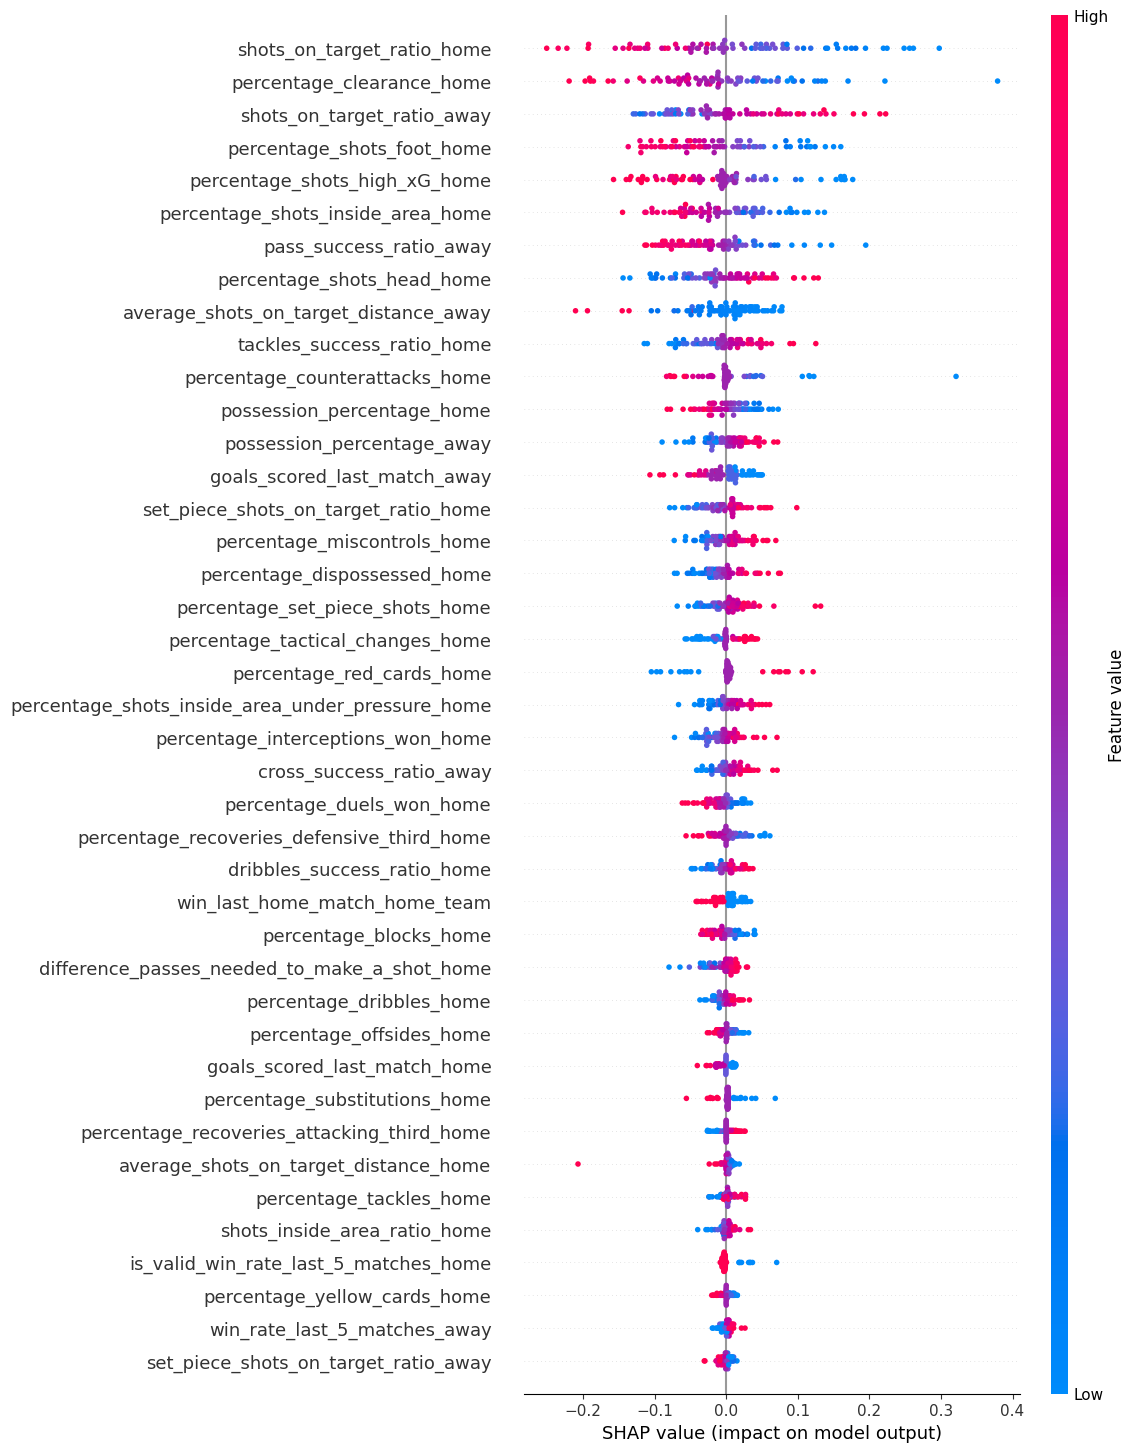

Class 1: draw
Important features (39):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'pass_success_ratio_away', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'goals_scored_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home', 'percentage_yellow_cards_home', 'percentage_red_cards_home', 'p

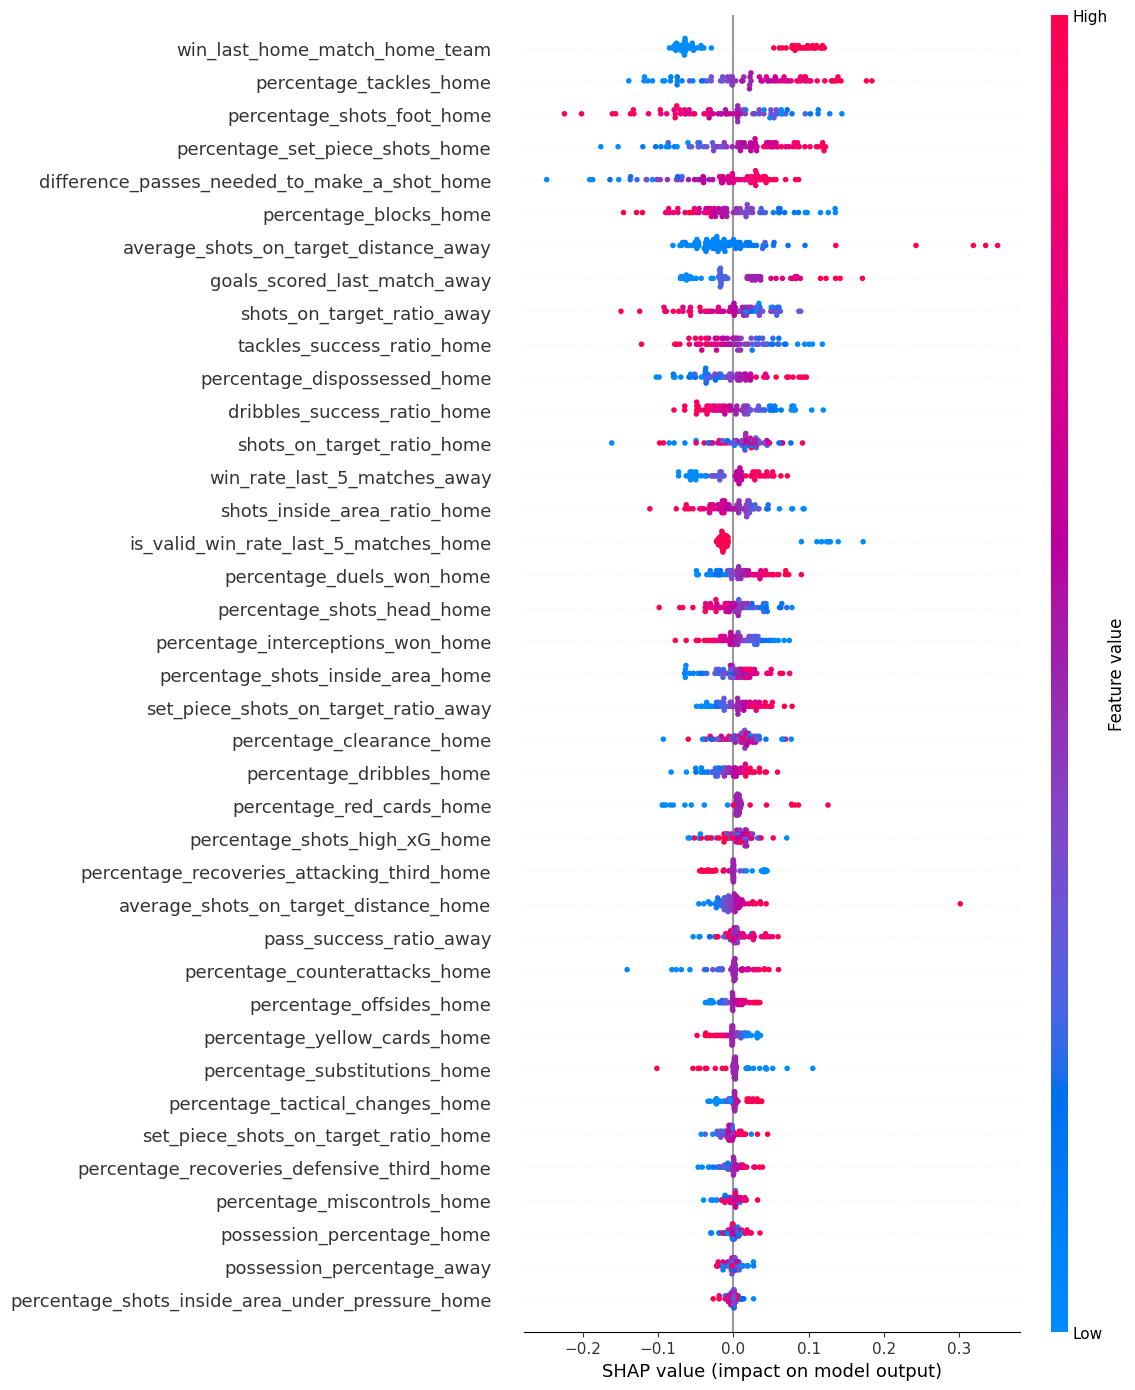

Class 2: home_team
Important features (41):
['shots_on_target_ratio_home', 'shots_on_target_ratio_away', 'average_shots_on_target_distance_home', 'average_shots_on_target_distance_away', 'shots_inside_area_ratio_home', 'pass_success_ratio_away', 'cross_success_ratio_away', 'tackles_success_ratio_home', 'dribbles_success_ratio_home', 'possession_percentage_home', 'possession_percentage_away', 'set_piece_shots_on_target_ratio_home', 'set_piece_shots_on_target_ratio_away', 'is_valid_win_rate_last_5_matches_home', 'win_rate_last_5_matches_away', 'win_last_home_match_home_team', 'goals_scored_last_match_home', 'goals_scored_last_match_away', 'percentage_shots_high_xG_home', 'percentage_shots_inside_area_home', 'percentage_shots_foot_home', 'percentage_shots_head_home', 'difference_passes_needed_to_make_a_shot_home', 'percentage_interceptions_won_home', 'percentage_blocks_home', 'percentage_duels_won_home', 'percentage_tackles_home', 'percentage_clearance_home', 'percentage_miscontrols_home'

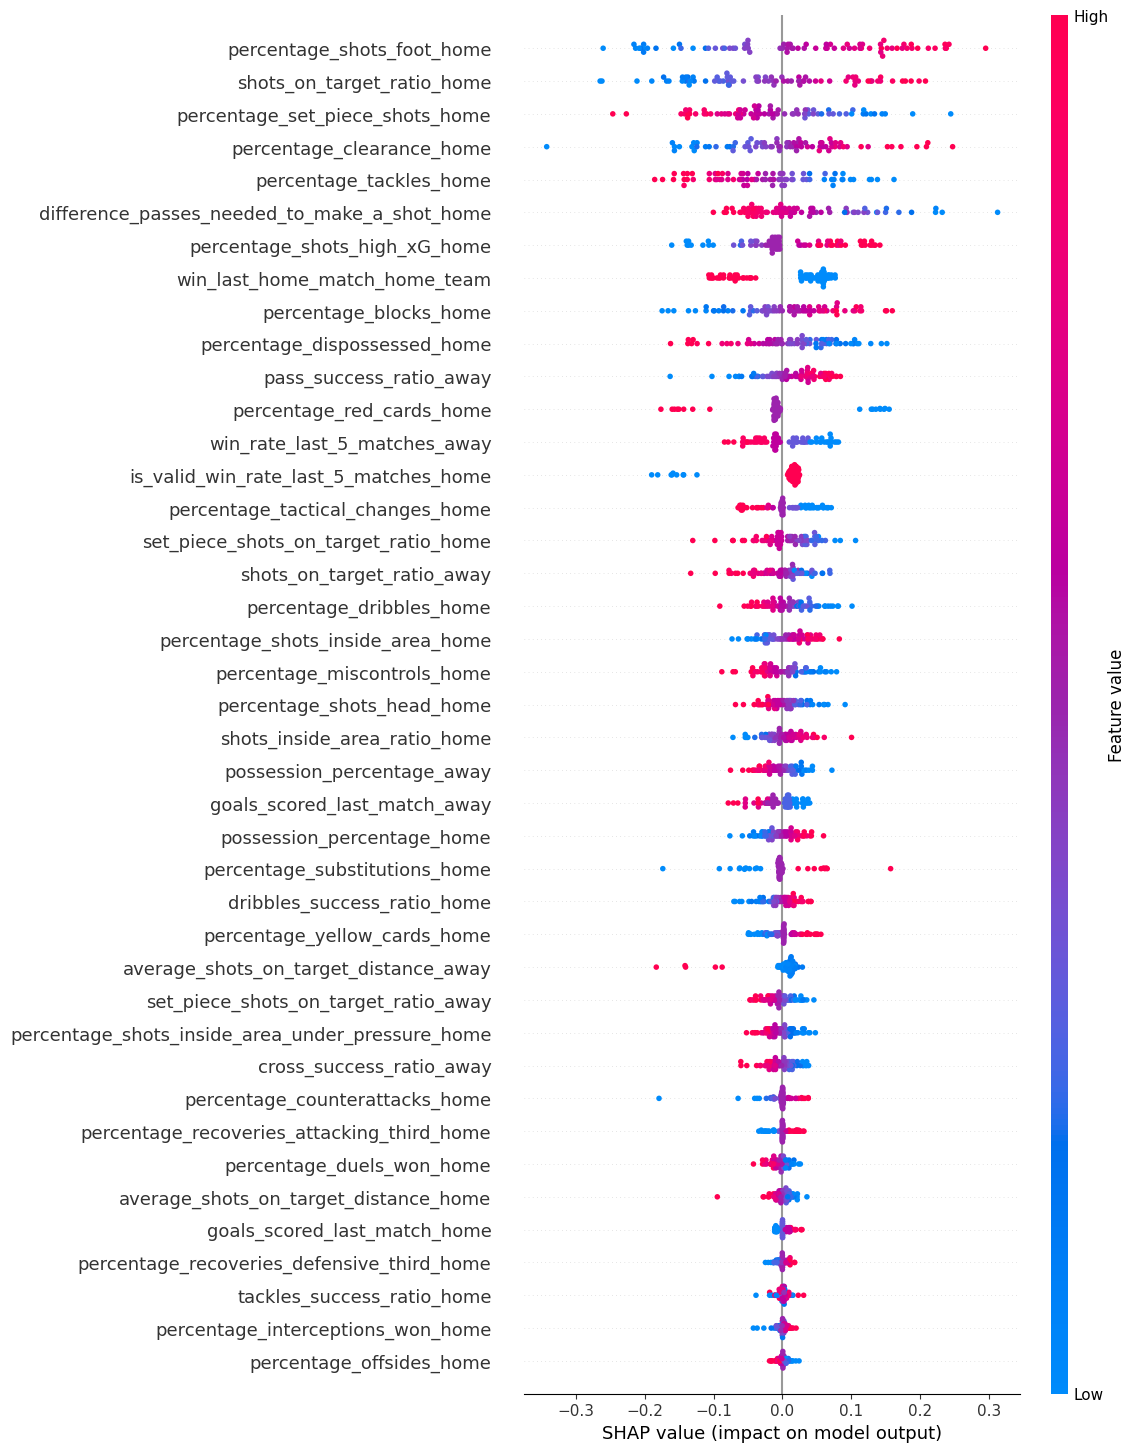

In [6]:
from src.analysis import plot_shap_summary

plot_shap_summary(shap_values_PL, feature_names_reduced_PL, encoder_PL)

Vamos a analizar cada uno de los gr√°ficos:

- **Victoria del equipo visitante**: Este gr√°fico muestra las caracter√≠sticas que favorecen o disminuyen la probabilidad de victoria del equipo visitante en la Premier League.
    - **Caracter√≠sticas que favorecen la victoria del equipo visitante**: üìà
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta tiene m√°s probabilidades de marcar y ganar.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a√©reo, lo que puede ser m√°s predecible y menos efectivo.
        - `possession_percentage_away`: Controlar la posesi√≥n fuera de casa permite al equipo visitante imponer su ritmo y dificultar el juego del equipo local.
        - `percentage_miscontrols_home` y `percentage_dispossessed_home`: M√°s errores en el control del bal√≥n y p√©rdidas de posesi√≥n por parte del equipo local pueden derivar en oportunidades de contraataque para el equipo visitante.
        - `percentage_tactical_changes_home`: Un mayor n√∫mero de cambios t√°cticos del equipo local puede sugerir problemas en su planteamiento inicial, lo que favorece al visitante.
        - `percentage_red_cards_home`: Si el equipo local recibe m√°s tarjetas rojas, pierde jugadores y puede ver afectada su estructura defensiva.
        - `percentage_shots_inside_area_under_pressure_home`: Un alto porcentaje de tiros bajo presi√≥n por parte del equipo local indica que est√° siendo inc√≥modo en ataque, lo que favorece a la defensa visitante.
        - `cross_success_ratio_away`: Una mayor precisi√≥n en los pases y centros del equipo visitante aumenta su capacidad para generar ocasiones de gol.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m√°s pases para generar un tiro, significa que su ataque es menos eficiente, lo que favorece al visitante.
        - `win_rate_last_5_matches_away`: Si el equipo visitante viene con una buena din√°mica en los √∫ltimos cinco partidos, tiene m√°s opciones de ganar el partido que nos incumbe.
        - `percentage_duels_won_home`: Un equipo local que gana menos que el equipo visiatnte puede hacer que el equipo visitante controle m√°s el juego y gane el partido.
        - `win_last_home_match_home_team`: Si el equipo local gan√≥ su √∫ltimo partido en casa, no es necesariamente un factor negativo para el visitante, ya que puede hacer que el equipo local se conf√≠e y deje espacios.
    - **Caracter√≠sticas que no favorecen la victoria del equipo visitante**: üìâ
        - `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros a puerta genera peligro y reduce las posibilidades de que el equipo visitante gane.
        - `percentage_clearance_home`: Si el equipo local realiza despejes efectivos, reduce las oportunidades de ataque del equipo visitante, favoreciendo su victoria.
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie por parte del equipo local indica una mayor generaci√≥n de oportunidades claras, lo que favorece su victoria.
        - `percentage_shots_high_xG_home`: Si el equipo local consigue disparos con alta expectativa de gol (xG), la probabilidad de que anote y complique la victoria visitante aumenta.
        - `percentage_shots_inside_area_home`: Si el equipo local tiene un alto n√∫mero de tiros dentro del √°rea, est√° generando m√°s peligro y puede hacer m√°s dif√≠cil la victoria visitante.
        - `average_shots_on_target_distance_away`: Un valor muy alto en la distancia media de los tiros del equipo visitante hace que tengas menos posibilidades de marcar, perjudicando a la victoria del equipo visitante.
        - `percentage_counterattacks_home`: Si el equipo local genera m√°s contraataques, puede aprovechar los espacios dejados por el visitante y hacerle da√±o.
        - `possession_percentage_away`: Controlar la posesi√≥n en casa permite al equipo local imponer su ritmo y dificultar el juego del equipo visitante.
        - `percentage_recoveries_defensive_third_home`: Un equipo local que recupera muchos balones en su zona defensiva impide que el equipo visitante pueda finalizar sus ataques con claridad.
        - `win_last_home_match_home_team`: Un equipo local que viene de ganar su √∫ltimo partido hace que el equipo visitante tenga m√°s complicado ganarle el partido.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, est√° reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar.
        - `goals_scored_last_match_home`: Si el equipo local anot√≥ varios goles en su √∫ltimo partido, puede llegar con confianza y efectividad, complicando el triunfo visitante.
    - **Conclusi√≥n**: Para que un equipo visitante logre la victoria, necesita ser efectivo en ataque y aprovechar las debilidades del rival. Un alto porcentaje de tiros a puerta, especialmente desde dentro del √°rea, junto con una presi√≥n eficaz sobre los pases en el √°rea local, aumentan sus probabilidades de √©xito. Adem√°s, errores clave del equipo local, como p√©rdidas de bal√≥n, imprecisiones en los pases y una dependencia excesiva del juego a√©reo, benefician al visitante. La capacidad del equipo visitante para realizar centros precisos y mantener una circulaci√≥n fluida del bal√≥n tambi√©n juega un papel fundamental. Sin embargo, si el equipo local es agresivo en ataque, con un elevado n√∫mero de tiros de alta calidad (xG) y √©xito en los regates, la victoria visitante se complica. Elementos como la forma reciente de los equipos, las tarjetas amarillas y las recuperaciones defensivas no parecen ser determinantes en este resultado.

- **Empate**: Este gr√°fico muestra las caracter√≠sticas que favorecen o disminuyen la probabilidad de empate en un partido en la Premier League. El empate en un partido se ve influenciado por el equilibrio entre ambos equipos en aspectos ofensivos, defensivos y de control del juego.
    - **Caracter√≠sticas que favorecen el empate**: üìà
        - `percentage_tackles_home`: Un equipo local con una cantidad equilibrada de entradas puede generar un partido con menos transiciones r√°pidas y menos oportunidades de gol.
        - `difference_passes_needed_to_make_a_shot_home`: Un equipo local que requiere m√°s pases para generar disparos puede estar optando por un estilo de juego m√°s pausado y estructurado, lo que reduce la posibilidad de que uno de los dos equipos rompa el empate.
        - `average_shots_on_target_distance_home` y `average_shots_on_target_distance_away`: Ambos equipos disparando desde distancias m√°s lejanas pueden significar que generan menos peligro real, aumentando la posibilidad de un partido cerrado.
        - `win_last_home_match_home_team`: Si el equipo local gan√≥ su √∫ltimo partido en casa, puede reflejar estabilidad en su rendimiento, lo que reduce la probabilidad de una derrota.
        - `goals_scored_last_match_away`: Si el equipo visitante ha anotado recientemente, es m√°s probable que tenga capacidad ofensiva suficiente para igualar un marcador adverso.
        - `percentage_set_piece_shots_home`: Si el equipo local tiene una cantidad considerable de tiros desde jugadas a bal√≥n parado respecto al visitante pero no los convierte en goles, esto favorece que el marcador se mantenga igualado.
        - `win_rate_last_5_matches_away`: Un equipo visitante con una racha de resultados equilibrada en los √∫ltimos cinco partidos es menos propenso a perder.
        - `percentage_duels_won_home`: Si el equipo local gana m√°s duelos, el partido puede volverse m√°s disputado, lo que evita que uno de los dos equipos se imponga con claridad.
        - `percentage_shots_inside_area_home`: Un equipo local que genera tiros dentro del √°rea sin marcar puede indicar dificultades para finalizar sus oportunidades, contribuyendo a un empate.
        - `set_piece_shots_on_target_ratio_away`: Un equipo visitante con precisi√≥n en jugadas a bal√≥n parado puede igualar el marcador si el equipo local se adelanta.
        - `percentage_tactical_changes_home`: Un equipo local que hace m√°s cambios t√°cticos que el visitante debido a que se esta viendo sobrepasado pero que es capaz de, con estos cambios, cambiar la din√°mica del partido, favorece el empate.
    - **Caracter√≠sticas que no favorecen el empate**: üìâ
        - `percentage_shots_foot_home`: Un mayor porcentaje de tiros con el pie por parte del equipo local indica una mayor generaci√≥n de oportunidades claras, lo que favorece su victoria.
        - `shots_on_target_ratio_away`: Un equipo visitante con un alto porcentaje de tiros a puerta tiene m√°s probabilidades de marcar y ganar.
        - `tackles_success_ratio_home`: Un equipo local con un alto porcentaje de √©xito en sus entradas defensivas puede generar m√°s transiciones r√°pidas, aumentando la posibilidad de ganar.
        - `dribbles_success_ratio_home`: Un equipo local que supera con √©xito a sus rivales en regates puede generar m√°s peligro y romper el equilibrio del partido.
        - `shots_inside_area_ratio_home`: Un alto porcentaje de tiros dentro del √°rea del equipo local implica que est√° generando m√°s oportunidades claras de gol y aumentando la posibilidad de ganar.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a√©reo, lo que puede ser m√°s predecible y menos efectivo, favoreciendo de esta manera la victoria del equipo visitante.
        - `percentage_interceptions_won_home`: Si el equipo local tiene un alto porcentaje de intercepciones ganadas respecto al equipo visitante, puede significar que el local no esta dando tregua ninguna al equipo visitante y que va a llevarse la victoria en el partido.
        - `percentage_recoveries_attacking_third_home`: Si el equipo local recupera balones en la zona de ataque con frecuencia, puede generar m√°s ocasiones de gol, reduciendo la probabilidad de empate.
        - `percentage_substitutions_home`: Si el equipo local realiza muchas sustituciones t√°cticas, podr√≠a estar buscando ajustes ofensivos para romper el empate y ganar el partido.
    - **Conclusi√≥n**: El empate suele ocurrir cuando el partido es equilibrado en t√©rminos de posesi√≥n, efectividad en ataque y presi√≥n defensiva. Equipos que manejan bien la posesi√≥n, que presentan solidez defensiva y que evitan conceder oportunidades claras al rival tienden a protagonizar m√°s empates. Recuperaciones en el medio campo y presi√≥n tras p√©rdida dificultan la fluidez del juego, lo que impide que un equipo imponga su dominio. Adem√°s, si el equipo visitante tiene un buen rendimiento reciente, es menos probable que pierda, favoreciendo un resultado igualado. Sin embargo, cuando uno de los equipos demuestra superioridad en regates, √©xito en jugadas a bal√≥n parado o una mayor precisi√≥n en pases clave, la probabilidad de empate disminuye. Factores como la cantidad de tarjetas amarillas, las recuperaciones en zonas defensivas y ciertos aspectos de rendimiento no parecen ser influyentes en el resultado final.

- **Victoria del equipo local**: Este gr√°fico muestra las caracter√≠sticas que favorecen o disminuyen la probabilidad de victoria del equipo local en la Premier League.
    - **Caracter√≠sticas que favorecen la victoria del equipo local**: üìà
        - `percentage_shots_foot_home`, `shots_on_target_ratio_home`: Un equipo local con un alto porcentaje de tiros con el pie y a puerta tiene m√°s probabilidades de marcar goles y ganar.
        - `percentage_clearance_home`: Si el equipo local realiza despejes efectivos, reduce las oportunidades de ataque del equipo visitante, favoreciendo su victoria.
        - `percentage_shots_high_xG_home`: Si los tiros del equipo local tienen un alto expected goals (xG), son m√°s peligrosos y pueden traducirse en goles.
        - `percentage_blocks_home`: Si el equipo local bloquea muchos tiros, est√° reduciendo la efectividad ofensiva del equipo visitante y dificultando sus opciones de anotar.
        - `percentage_shots_inside_area_home`, `shots_inside_area_ratio_home`: Si el equipo local tiene un alto n√∫mero de tiros dentro del √°rea respecto al total de partido (ambos equipos) y respecto a los tiros que hace en todo el partido, est√° generando m√°s peligro.
        - `possession_percentage_home`, `percentage_substitutions_home`: Controlar la posesi√≥n y realizar sustituciones efectivas permite al equipo local imponer su juego y mantener la ventaja.
        - `dribbles_sucess_ratio_home`: Un equipo local con un ratio alto de regates completados significa que esta siendo capaz de generar peligro y superioridades en los ataques, aumentando as√≠ sus posibilidades de crear peligro.
        - `percentage_recoveries_attacking_third_home`, `percentage_interceptions_won_home`: Un equipo local que recupera el bal√≥n en zonas ofensivas y gana m√°s intercepciones puede presionar mejor y generar m√°s ocasiones.
        - `goals_scored_last_match_home`: Un equipo local que viene de marcar varios goles puede venir en un buen pico de rendimiento al partido actual.
    - **Caracter√≠sticas que no favorecen la victoria del equipo local**: üìâ
        - `percentage_set_piece_shots_home`: Si el equipo local tiene un alto porcentaje de tiros desde jugadas a bal√≥n parado respecto al visitante puede significar que no esta consiguiendo generar peligro desde jugadas elaboradas y que solo lo intenta desde jugadas a bal√≥n parado reduciendo sus posibilidades de ganar el partido.
        - `percentage_tackles_home`: Un equipo local que hace m√°s tackles que el equipo visitantes puede significar que esta defendiendo m√°s que el equipo visitante y, por tanto, esta generando menos ocasiones de gol.
        - `difference_passes_needed_to_make_a_shot_home`: Si el equipo local necesita m√°s pases para generar un disparo, su ataque es menos eficiente.
        - `percentage_dispossessed_home`, `percentage_miscontrols_home`: Un equipo local que pierde m√°s el bal√≥n o comete errores en el control puede facilitar ataques del rival.
        - `percentage_red_cards_home`: Un equipo local que recibe m√°s tarjetas podr√≠a quedarse en inferioridad num√©rica o desestabilizarse.
        - `win_rate_last_5_matches_away`: Un equipo visitante que viene con una buena din√°mica en los √∫ltimos cinco partidos puede hacer que el equipo local no gan√© el partido.
        - `shots_on_target_ratio_away`, `set_piece_shots_on_target_away`: Si el equipo visitante tiene un alto porcentaje de tiros a puerta, genera m√°s peligro y reduce las opciones del equipo local.
        - `percentage_tactical_changes_home`: Si el equipo local tiene que hacer m√°s cambios t√°cticos que el equipo visitante puede deberse a que esta vi√©ndose superado en varias ocasiones por el equipo visitante.
        - `percentage_shots_head_home`: Un alto porcentaje de tiros de cabeza del equipo local puede indicar que su ataque depende excesivamente de centros y juego a√©reo, lo que puede ser m√°s predecible y menos efectivo.
        - `possession_percentage_away`: Controlar la posesi√≥n fuera de casa permite al equipo visitante imponer su ritmo y dificultar el juego del equipo local.
        - `goals_scored_last_match_away`: Un equipo visitante que viene de marcar varios goles puede venir en un buen pico de rendimiento al partido actual.
        - `percentage_shots_inside_area_under_pressure_home`: Un alto porcentaje de tiros dentro del √°rea bajo presi√≥n por parte del equipo local puede significar que sus oportunidades de gol son menos efectivas.
    - **Conclusi√≥n**: Un equipo local aumenta sus probabilidades de victoria cuando es ofensivamente eficiente y logra generar ocasiones claras dentro del √°rea rival. Un alto porcentaje de tiros a puerta y la constancia en su producci√≥n ofensiva a lo largo de los partidos son factores clave. Adem√°s, mantener el control del partido mediante la posesi√≥n y realizar sustituciones estrat√©gicas permite optimizar su rendimiento. Sin embargo, si el equipo visitante demuestra precisi√≥n en ataque y con altos valores en tiros a puerta, la victoria local se ve amenazada. Tambi√©n influyen negativamente las p√©rdidas de bal√≥n, la incapacidad para concretar ataques y la falta de contundencia defensiva. Aspectos como la forma reciente del equipo visitante o ciertas m√©tricas defensivas espec√≠ficas no parecen tener una relaci√≥n clara con la victoria del equipo local.

- **Conclusiones generales**:
    - *Victoria del equipo visitante*: Un equipo visitante aumenta sus posibilidades de victoria cuando es eficiente en ataque y aprovecha las debilidades del rival. Un alto porcentaje de tiros a puerta, especialmente desde dentro del √°rea, junto con una presi√≥n efectiva sobre los pases en el √°rea local, son factores clave. Adem√°s, errores del equipo local, como p√©rdidas de bal√≥n y dependencia excesiva del juego a√©reo, favorecen al visitante. Tambi√©n son importantes la precisi√≥n en los centros y el √©xito en la circulaci√≥n del bal√≥n. Sin embargo, si el equipo local genera muchas ocasiones de alta calidad (xG), mantiene la posesi√≥n y es preciso en sus regates, la victoria del visitante se complica.
    - *Empate*: Los empates suelen darse en partidos equilibrados, donde ninguno de los equipos logra imponerse con claridad. La posesi√≥n distribuida, la presi√≥n tras p√©rdida y las recuperaciones en el medio campo dificultan el dominio de un solo equipo. Un equipo visitante con buen rendimiento reciente es menos propenso a perder, lo que favorece un empate. Sin embargo, si uno de los equipos tiene mayor precisi√≥n en jugadas a bal√≥n parado, en regates o en la creaci√≥n de ocasiones peligrosas, la probabilidad de empate disminuye.
    - *Victoria del equipo local*: La victoria del equipo local est√° impulsada por su capacidad para generar peligro en el √°rea rival con un alto porcentaje de tiros a puerta y efectividad en jugadas a bal√≥n parado. Un equipo que mantiene la posesi√≥n, realiza sustituciones estrat√©gicas y controla el ritmo del partido tiene m√°s probabilidades de ganar. Sin embargo, las p√©rdidas de bal√≥n, la falta de contundencia en ataque y la precisi√≥n del equipo visitante en tiros a puerta pueden reducir la ventaja del equipo local.
    - *Factores no determinantes*: Algunos factores no parecen influir de manera significativa en el resultado del partido. M√©tricas como la cantidad de tarjetas amarillas, las recuperaciones defensivas y algunos cambios t√°cticos no tienen un impacto directo en la victoria de un equipo o en la probabilidad de empate. En general, la eficiencia ofensiva y la capacidad para minimizar errores son los principales determinantes del resultado de un partido.